/tmp/ipython-input-2-719287761.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288588  24.757342  23.848713  24.746234  212818400
2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937569  24.037539  23.704302  23.815381  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


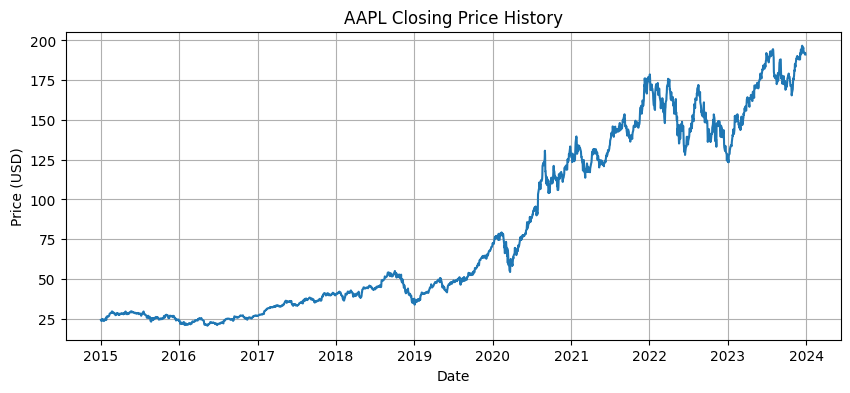

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0170 - val_loss: 0.0023
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.1005e-04 - val_loss: 0.0013
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.8007e-04 - val_loss: 0.0017
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.5888e-04 - val_loss: 0.0013
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.1784e-04 - val_loss: 0.0023
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.0336e-04 - val_loss: 0.0011
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.9697e-04 - val_loss: 0.0018
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.7386e-04 - val_loss: 9.7895e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 2.8809e-04 - val_loss: 9.6793e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.6354e-04 - val_loss: 0.0012
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


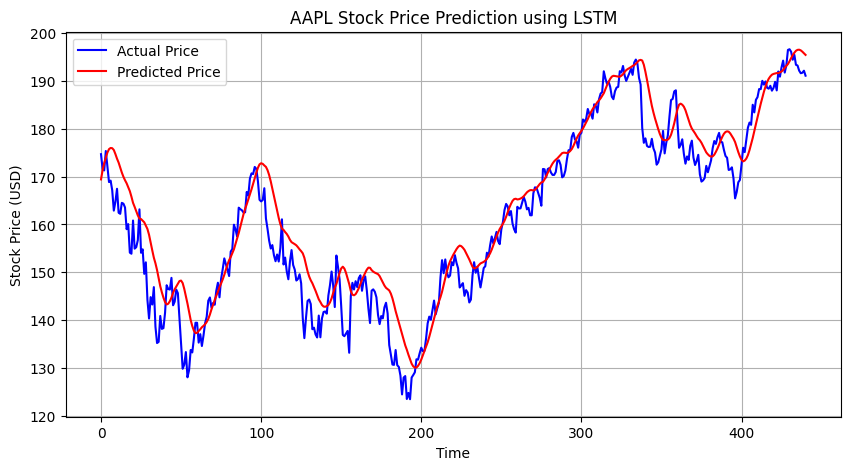

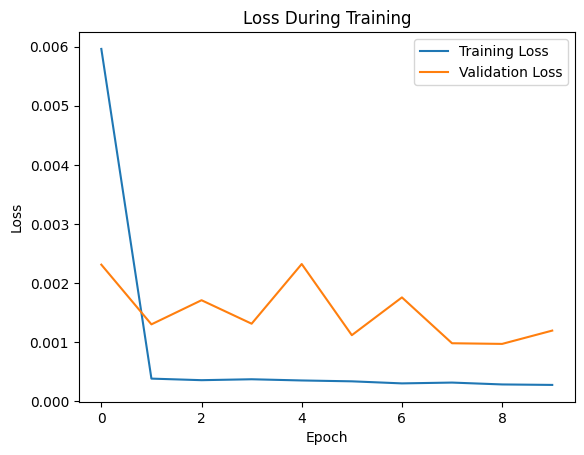

In [2]:
# ✅ STEP 1: Install Required Library
!pip install yfinance --quiet

# ✅ STEP 2: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ✅ STEP 3: Download Historical Stock Data (e.g., Apple - AAPL)
ticker = 'AAPL'  # You can change to 'TSLA', 'GOOG', 'RELIANCE.NS', etc.
df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
print(df.head())

# ✅ STEP 4: Use Only 'Close' Prices
data = df[['Close']]
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title(f"{ticker} Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

# ✅ STEP 5: Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ✅ STEP 6: Create Time-Series Sequences
def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(dataset)):
        X.append(dataset[i-seq_length:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# ✅ STEP 7: Reshape for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# ✅ STEP 8: Train-Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ✅ STEP 9: Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# ✅ STEP 10: Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# ✅ STEP 11: Predict and Reverse Scaling
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ✅ STEP 12: Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title(f"{ticker} Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ✅ STEP 13: Plot Model Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
